In [1]:
import numpy as np 
import scanpy as sc 
import pandas as pd 

In [2]:
import anndata2ri
import logging

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [4]:
# from rpy2.robjects.packages import importr
# utils = importr('utils')
# utils.chooseCRANmirror(ind=1)
# utils.install_packages("biomaRt")
# biomaRt = rpackages.importr("biomaRt")

In [5]:
import biomart

In [115]:
adata = sc.read_csv("/Users/omercagatay/Desktop/Courses/Cmscb/Project/datasets/counttable_es.csv", delimiter=" ", first_column_names=True)
# data  = pd.read_csv("/Users/omercagatay/Desktop/Courses/Cmscb/Project/datasets/counttable_es.csv", delimiter=" ")

In [ ]:
# .var : pd df, annotation of var's
# .X : np array, obsxvar 
# .obs : pd df, annotation of obs's 
# .uns : dict, unstruct annotation 

In [8]:
def get_ensembl_mappings():                                   
    # Set up connection to server                                               
    server = biomart.BiomartServer('http://uswest.ensembl.org/biomart')         
    mart = server.datasets['mmusculus_gene_ensembl']                            
                                                                                
    # List the types of data we want                                            
    attributes = ['ensembl_transcript_id', 'mgi_symbol', 
                  'ensembl_gene_id', 'ensembl_peptide_id']
                                                                                
    # Get the mapping between the attributes                                    
    response = mart.search({'attributes': attributes})                          
    data = response.raw.data.decode('ascii')                                    
                                                                                
    ensembl_to_genesymbol = {}                                                  
    # Store the data in a dict                                                  
    for line in data.splitlines():                                              
        line = line.split('\t')                                                 
        # The entries are in the same order as in the `attributes` variable
        transcript_id = line[0]                                                 
        gene_symbol = line[1]                                                   
        ensembl_gene = line[2]                                                  
        ensembl_peptide = line[3]                                               
                                                                                
        # Some of these keys may be an empty string. If you want, you can 
        # avoid having a '' key in your dict by ensuring the 
        # transcript/gene/peptide ids have a nonzero length before
        # adding them to the dict
        ensembl_to_genesymbol[transcript_id] = gene_symbol                      
        ensembl_to_genesymbol[ensembl_gene] = gene_symbol                       
        ensembl_to_genesymbol[ensembl_peptide] = gene_symbol                
                                                                                
    return ensembl_to_genesymbol

In [10]:
ensemble_dict = get_ensembl_mappings()

In [147]:
ensemble_dict

{'ENSMUST00000082387': 'mt-Tf',
 'ENSMUSG00000064336': 'mt-Tf',
 '': 'Olfr1193',
 'ENSMUST00000082388': 'mt-Rnr1',
 'ENSMUSG00000064337': 'mt-Rnr1',
 'ENSMUST00000082389': 'mt-Tv',
 'ENSMUSG00000064338': 'mt-Tv',
 'ENSMUST00000082390': 'mt-Rnr2',
 'ENSMUSG00000064339': 'mt-Rnr2',
 'ENSMUST00000082391': 'mt-Tl1',
 'ENSMUSG00000064340': 'mt-Tl1',
 'ENSMUST00000082392': 'mt-Nd1',
 'ENSMUSG00000064341': 'mt-Nd1',
 'ENSMUSP00000080991': 'mt-Nd1',
 'ENSMUST00000082393': 'mt-Ti',
 'ENSMUSG00000064342': 'mt-Ti',
 'ENSMUST00000082394': 'mt-Tq',
 'ENSMUSG00000064343': 'mt-Tq',
 'ENSMUST00000082395': 'mt-Tm',
 'ENSMUSG00000064344': 'mt-Tm',
 'ENSMUST00000082396': 'mt-Nd2',
 'ENSMUSG00000064345': 'mt-Nd2',
 'ENSMUSP00000080992': 'mt-Nd2',
 'ENSMUST00000082397': 'mt-Tw',
 'ENSMUSG00000064346': 'mt-Tw',
 'ENSMUST00000082398': 'mt-Ta',
 'ENSMUSG00000064347': 'mt-Ta',
 'ENSMUST00000082399': 'mt-Tn',
 'ENSMUSG00000064348': 'mt-Tn',
 'ENSMUST00000082400': 'mt-Tc',
 'ENSMUSG00000064349': 'mt-Tc',
 'ENSMU

In [116]:
adata

AnnData object with n_obs × n_vars = 38658 × 704

In [117]:
df = adata.to_df().reset_index().rename(columns={'index': 'ENSEMBL'}).copy()
df['SYMBOL'] = df['ENSEMBL'].apply(lambda x: ensemble_dict.get(x, x))
df

,ENSEMBL,ola_mES_2i_2_1.counts,ola_mES_2i_2_10.counts,ola_mES_2i_2_11.counts,ola_mES_2i_2_12.counts,ola_mES_2i_2_13.counts,ola_mES_2i_2_14.counts,ola_mES_2i_2_15.counts,ola_mES_2i_2_16.counts,ola_mES_2i_2_17.counts,...,ola_mES_lif_3_87.counts,ola_mES_lif_3_88.counts,ola_mES_lif_3_89.counts,ola_mES_lif_3_9.counts,ola_mES_lif_3_90.counts,ola_mES_lif_3_92.counts,ola_mES_lif_3_94.counts,ola_mES_lif_3_95.counts,ola_mES_lif_3_96.counts,SYMBOL
0,ENSMUSG00000000001,272.0,368.0,1431.0,2249.0,385.0,1053.0,1424.0,1117.0,991.0,...,251.0,71.0,40.0,620.0,1235.0,255.0,1142.0,644.0,278.0,Gnai3
1,ENSMUSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pbsn
2,ENSMUSG00000000028,271.0,983.0,1248.0,971.0,1149.0,432.0,2406.0,863.0,179.0,...,175.0,11.0,55.0,228.0,122.0,126.0,60.0,161.0,39.0,Cdc45
3,ENSMUSG00000000031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,469.0,32.0,3.0,1729.0,55.0,0.0,25.0,214.0,H19
4,ENSMUSG00000000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scml2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38653,__no_feature,1035805.0,1143986.0,1088833.0,1897236.0,1519459.0,1087915.0,2973745.0,851547.0,1580678.0,...,552094.0,413858.0,289953.0,925148.0,674889.0,637793.0,605733.0,569192.0,289682.0,__no_feature
38654,__ambiguous,159512.0,299140.0,373653.0,373876.0,217614.0,200511.0,332272.0,232707.0,215467.0,...,83536.0,85587.0,31816.0,77122.0,122713.0,74441.0,71511.0,78134.0,48777.0,__ambiguous
38655,__too_low_aQual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,__too_low_aQual
38656,__not_aligned,873322.0,1690488.0,1892206.0,1841950.0,1196186.0,1205253.0,1621658.0,1236445.0,1231952.0,...,484794.0,421421.0,202768.0,578093.0,528633.0,425831.0,403612.0,416470.0,289815.0,__not_aligned


In [118]:
cols = df.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:-1] 
df=df[cols]
df

,ENSEMBL,SYMBOL,ola_mES_2i_2_1.counts,ola_mES_2i_2_10.counts,ola_mES_2i_2_11.counts,ola_mES_2i_2_12.counts,ola_mES_2i_2_13.counts,ola_mES_2i_2_14.counts,ola_mES_2i_2_15.counts,ola_mES_2i_2_16.counts,...,ola_mES_lif_3_84.counts,ola_mES_lif_3_87.counts,ola_mES_lif_3_88.counts,ola_mES_lif_3_89.counts,ola_mES_lif_3_9.counts,ola_mES_lif_3_90.counts,ola_mES_lif_3_92.counts,ola_mES_lif_3_94.counts,ola_mES_lif_3_95.counts,ola_mES_lif_3_96.counts
0,ENSMUSG00000000001,Gnai3,272.0,368.0,1431.0,2249.0,385.0,1053.0,1424.0,1117.0,...,211.0,251.0,71.0,40.0,620.0,1235.0,255.0,1142.0,644.0,278.0
1,ENSMUSG00000000003,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUSG00000000028,Cdc45,271.0,983.0,1248.0,971.0,1149.0,432.0,2406.0,863.0,...,91.0,175.0,11.0,55.0,228.0,122.0,126.0,60.0,161.0,39.0
3,ENSMUSG00000000031,H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,469.0,32.0,3.0,1729.0,55.0,0.0,25.0,214.0
4,ENSMUSG00000000037,Scml2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38653,__no_feature,__no_feature,1035805.0,1143986.0,1088833.0,1897236.0,1519459.0,1087915.0,2973745.0,851547.0,...,477667.0,552094.0,413858.0,289953.0,925148.0,674889.0,637793.0,605733.0,569192.0,289682.0
38654,__ambiguous,__ambiguous,159512.0,299140.0,373653.0,373876.0,217614.0,200511.0,332272.0,232707.0,...,45991.0,83536.0,85587.0,31816.0,77122.0,122713.0,74441.0,71511.0,78134.0,48777.0
38655,__too_low_aQual,__too_low_aQual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38656,__not_aligned,__not_aligned,873322.0,1690488.0,1892206.0,1841950.0,1196186.0,1205253.0,1621658.0,1236445.0,...,298647.0,484794.0,421421.0,202768.0,578093.0,528633.0,425831.0,403612.0,416470.0,289815.0


In [119]:
symbols=df.SYMBOL.to_list()
adata.obs_names = symbols

In [120]:
print([name for name in symbols if name.startswith('__')])

['__no_feature', '__ambiguous', '__too_low_aQual', '__not_aligned', '__alignment_not_unique']


In [124]:
# symbols = [name for name in symbols if not name.startswith('__')]
# adata[adata.obs_names.all() in symbols]

View of AnnData object with n_obs × n_vars = 1 × 704

In [127]:
adata.var_names_make_unique()
adata_t = adata.T
adata_t.var_names_make_unique()

In [ ]:
print("obs-cell: ", adata_t.obs_names[:5].tolist())
# print(adata.obs_names[-5:].tolist())
print("var-gene: ", adata_t.var_names[:5].tolist())
print(adata_t.var_names[-5:].tolist())

In [128]:
sc.pp.filter_cells(adata_t, min_genes=200)
sc.pp.filter_genes(adata_t, min_cells=5)

In [148]:
adata_t.var['mt'] = adata_t.var_names.str.startswith('mt')

In [149]:
sc.pp.calculate_qc_metrics(adata_t, qc_vars=['mt'], percent_top = None, log1p = False, inplace= True)

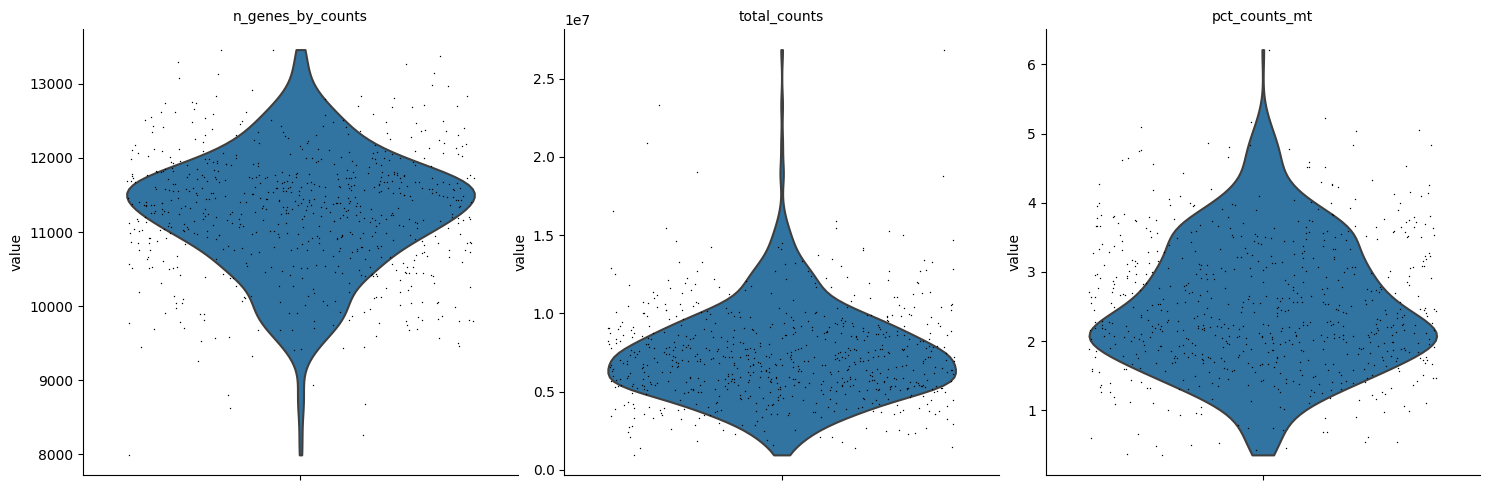

In [150]:
sc.pl.violin(adata_t, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [152]:
sc.tl.pca(adata_t, svd_solver='arpack')

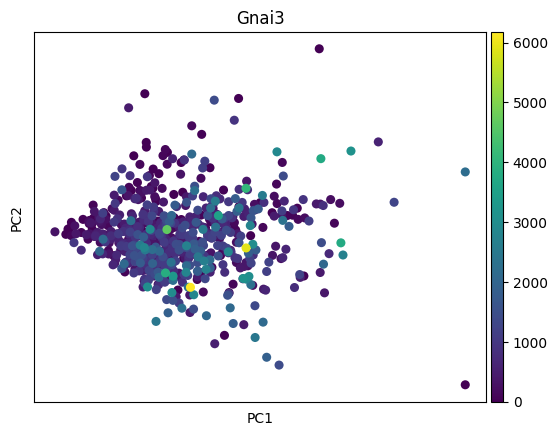

In [161]:
sc.pl.pca(adata_t, color= "Gnai3")

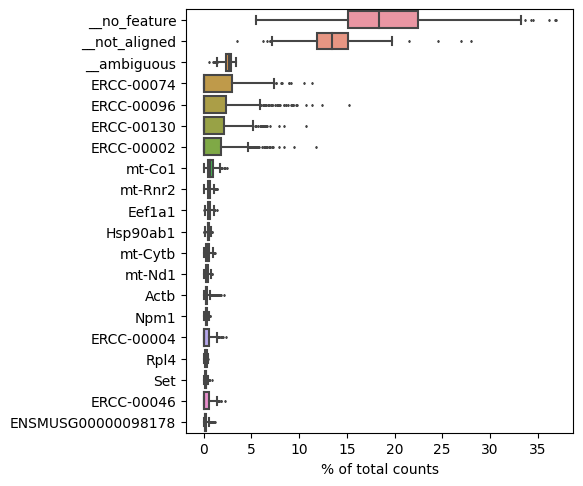

In [155]:
sc.pl.highest_expr_genes(adata_t, n_top=20, )

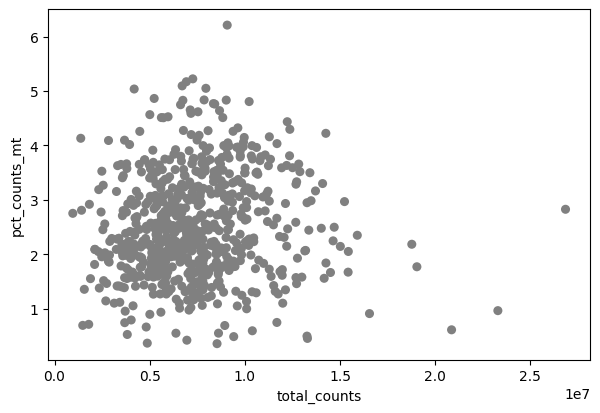

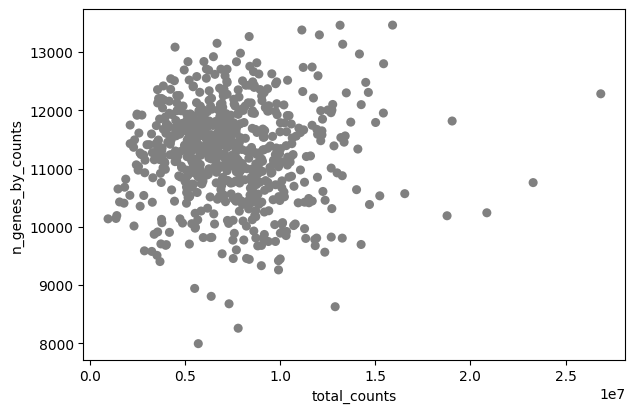

In [158]:
sc.pl.scatter(adata_t, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_t, x='total_counts', y='n_genes_by_counts')

In [157]:
sc.tl.umap(adata_t)

ValueError: Did not find .uns["neighbors"]. Run `sc.pp.neighbors` first.

### Notes 
UMI : Unique Molecular Identifier